In [1]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape # Dataframe Rows, Columns

(900000, 33)

In [4]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [5]:
del df['id']
del df['f_27']

In [21]:
df['f_26'].fillna(df['f_26'].mean(), inplace=True)

[0.03163428 0.03174018 0.03157616 0.02868601 0.02885761 0.02994565
 0.02878415 0.03571424 0.02909407 0.03114603 0.02799714 0.02911624
 0.03206395 0.02604821 0.03021043 0.03071177 0.02711817 0.02962896
 0.02746474 0.04283313 0.03671472 0.04902365 0.03996245 0.0400902
 0.04949221 0.04298545 0.05083811 0.03625911 0.01085791 0.03340508]


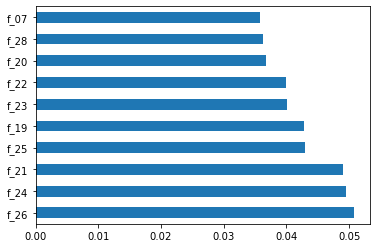

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df.drop(columns=['target'])
y = df['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
newdf = df[["f_19","f_22","f_24","f_26","f_21","f_25","target"]]

In [8]:
newdf.head()

,f_19,f_22,f_24,f_26,f_21,f_25,target
0,0.298218,-2.540739,-2.730628,1.363402,3.058541,-0.208177,0
1,-3.147667,2.278315,-1.217077,-0.058316,2.179050,-3.782194,1
2,2.820733,-1.385775,-0.009121,-3.703488,-0.784235,2.788536,1
3,1.081084,0.572594,1.686035,-0.608601,-2.343819,-2.533098,1
4,-0.126179,-3.912929,2.127649,4.371371,1.133665,-3.306784,1


In [9]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)

In [11]:
modelKNN = KNeighborsClassifier(n_neighbors=15)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (KNN):" "\n", accuracyKNN)

Model Accuracy (KNN):
 0.6586055555555556


In [14]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()
print(knn_mean)

0.6353986111111112


In [15]:
dftest = pd.read_csv("test.csv")

In [16]:
dftest.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [17]:
ntest = dftest[['f_26', 'f_21', 'f_24', 'f_25', 'f_19', 'f_22']]
ntest.head()

,f_26,f_21,f_24,f_25,f_19,f_22
0,5.734205,-1.006400,-2.427430,-1.966887,-1.128371,-1.193879
1,3.194219,2.382405,-2.848714,-0.725155,-4.424098,0.149442
2,0.066898,-7.026098,1.714005,0.585032,-1.523864,1.312277
3,3.893099,-0.594532,-2.364007,-1.003320,-1.404597,-3.939475
4,1.861884,0.084906,-3.557893,1.210687,-1.968516,-0.985736


In [18]:
newCSV = dftest[['id']]

In [19]:
newCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [28]:
predictionOnTest = modelKNN.predict(ntest)

In [29]:
predictionOnTest

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [1]:
newCSV['target'] = predictionOnTest 

In [34]:
newCSV

,id,target
0,900000,0
1,900001,0
2,900002,0
3,900003,0
4,900004,1
...,...,...
699995,1599995,0
699996,1599996,0
699997,1599997,0
699998,1599998,1


In [35]:
newCSV.to_csv('Yusraknn.csv', index=False)